# Natural Lands Processing

This notebooks is for any data processing necessary for natural lands data

In [1]:
# Import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors

In [2]:
### read in the data ###

# Administrative boundaries
soco_bound = gpd.read_file("../data/clean/sonoma_county_boundary/sonoma_county_boundary.shp")

# CA eco regions
ca_ecoregion_l3 = gpd.read_file("../data/raw/ca_ecoregions/ca_eco_l3.shp")
ca_ecoregion_l4 = gpd.read_file("../data/raw/ca_ecoregions/ca_eco_l4.shp")

# Sonoma Veg Map data
sonoma_veg = gpd.read_file("../data/raw/Sonoma_County_Veg_Map_Shp/Sonoma_Veg_Map_5_1.shp")

In [3]:
# convert data to the 2226 epsg we've been using for Sonoma
soco_bound = soco_bound.to_crs(epsg=2226)
ca_ecoregion_l3 = ca_ecoregion_l3.to_crs(epsg=2226)
ca_ecoregion_l4 = ca_ecoregion_l4.to_crs(epsg=2226)

In [5]:
sonoma_veg.sample(5)

,OBJECTID,MAP_CLASS,SOURCE,REL_COV,ALLIANCE,OID_COPY,Abbrv,LIFEFORM,LF_FOREST,SERP_FLAG,...,SD_QAV,MN_SKE,SD_SKE,MN_AVG,MN_KUR,SD_KUR,MN_STD,Shape_Leng,Shape_Area,geometry
41618,41619,Vineyard,Remotely Sensed,N/A,None,41619,Vineyard,Vineyard,Agriculture,0,...,-9999.000,-9999.000000,-9999.000000,-9999.0000,-9999.00000,-9999.00000,-9999.00000,731.080099,22024.044206,"POLYGON ((6318875.205 1934700.567, 6318909.217..."
179796,179797,"Quercus (agrifolia, douglasii, garryana, kello...",Remotely Sensed,0-10%S/90-100%H,None,179797,QU Spp.,Native Forest,Hardwood Forest,0,...,950.056,-0.129708,0.626834,31.9584,2.68138,1.40493,11.22320,2361.760094,133477.321117,"POLYGON ((6379005.000 1995384.000, 6378994.000..."
54434,54435,Pinus attenuata Alliance,Remotely Sensed,90-100%S/0-10%H,None,54435,PIAT,Native Forest,Conifer Forest,0,...,183.033,0.775643,0.605534,13.0000,3.31850,2.82968,4.73698,5065.749827,288380.240885,"POLYGON ((6433899.000 1892862.000, 6433884.000..."
67791,67792,Sequoia sempervirens Alliance,Remotely Sensed,70-90%S/10-30%H,None,67792,SESE,Native Forest,Conifer Forest,0,...,2806.520,-0.934600,0.722645,84.3371,5.13280,2.93845,19.42680,3782.217455,224425.218348,"POLYGON ((6184083.000 1976427.000, 6184086.000..."
40273,40274,Southwestern North American Riparian/Wash Scru...,Remotely Sensed,0-10%S/90-100%H,None,40274,Rip SW Scrub,Shrub,Riparian Shrub,0,...,-9999.000,-9999.000000,-9999.000000,-9999.0000,-9999.00000,-9999.00000,-9999.00000,1840.274230,39457.710029,"POLYGON ((6311764.000 1930620.000, 6311786.000..."


In [21]:
sonoma_veg.LF_FOREST.unique()

array(['Conifer Forest', 'Mixed Conifer-Hardwood Forest',
       'Hardwood Forest', 'Shrub', 'Herbaceous', 'Agriculture',
       'Barrren and Sparsely Vegetated', 'Herbaceous Wetland',
       'Developed', 'Non-native Forest', 'Forest Sliver',
       'Non-native Shrub', 'Salt Marsh', 'Riparian Forest',
       'Riparian Shrub', 'Water', 'Aquatic Vegetation'], dtype=object)

In [4]:
### Create a simplified ag lifeform column
 # Create conditions for groupin water years
conditions = [
     (sonoma_veg["LIFEFORM"].isin(['Annual Cropland', 'Intensively Managed Hayfield', 'Irrigated Pasture',
                                'Orchard or Grove', 'Perennial Agriculture','Vineyard',
                                'Nursery or Ornamental Horticultural Area', 'Vineyard Replant'])),
    (sonoma_veg["LIFEFORM"] == 'Water'),
    (sonoma_veg["LIFEFORM"].isin(['Developed', 'Major Roads','Urban Window'])),
    (sonoma_veg["LIFEFORM"].isin(['Native Forest', 'Non-native Forest & Woodland', 'Forest Sliver'])),
    (sonoma_veg["LIFEFORM"].isin(['Shrub','Non-native Shrub'])),
    (sonoma_veg["LIFEFORM"] == 'Barren & Sparsely Vegetated'),
    (sonoma_veg["LIFEFORM"] == 'Herbaceous')
    ]


 # create a list of the values we want to assign for each condition
values = [
    "Agriculture",
    "Aquatic Ecosystem",
    "Developed",
    "Forest",
    "Shrub",
    "Barren and Sparsely Vegetated",
    "Herbaceous"
]

# create a new column and use np.select to assign values to it using our lists as arguments
sonoma_veg["ag_simple"] = np.select(conditions, values)

In [31]:
test = sonoma_veg[sonoma_veg["natural_simple"] == "0"]
test.head()

,OBJECTID,MAP_CLASS,SOURCE,REL_COV,ALLIANCE,OID_COPY,Abbrv,LIFEFORM,LF_FOREST,SERP_FLAG,...,SD_SKE,MN_AVG,MN_KUR,SD_KUR,MN_STD,Shape_Leng,Shape_Area,geometry,ag_simple,natural_simple
6343,6344,Barren & Sparsely Vegetated,Remotely Sensed,N/A,None,6344,Barren,Barren & Sparsely Vegetated,Barrren and Sparsely Vegetated,0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,3977.961470,7.941577e+04,"POLYGON ((6259246.000 1874332.000, 6259230.000...",Barren and Sparsely Vegetated,0
6344,6345,Barren & Sparsely Vegetated,Remotely Sensed,N/A,None,6345,Barren,Barren & Sparsely Vegetated,Barrren and Sparsely Vegetated,0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,22807.542337,9.638366e+05,"POLYGON ((6255602.000 1875746.580, 6255609.000...",Barren and Sparsely Vegetated,0
6345,6346,Barren & Sparsely Vegetated,Remotely Sensed,N/A,None,6346,Barren,Barren & Sparsely Vegetated,Barrren and Sparsely Vegetated,0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,3744.840814,8.627640e+04,"POLYGON ((6258528.000 1874467.659, 6258516.000...",Barren and Sparsely Vegetated,0
6346,6347,Barren & Sparsely Vegetated,Remotely Sensed,N/A,None,6347,Barren,Barren & Sparsely Vegetated,Barrren and Sparsely Vegetated,0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,918.997605,5.038619e+04,"POLYGON ((6276570.804 1877260.475, 6276596.306...",Barren and Sparsely Vegetated,0
6347,6348,Barren & Sparsely Vegetated,Remotely Sensed,N/A,None,6348,Barren,Barren & Sparsely Vegetated,Barrren and Sparsely Vegetated,0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,48980.986623,3.562793e+06,"POLYGON ((6262205.461 1877976.359, 6262207.486...",Barren and Sparsely Vegetated,0


In [5]:
### Create a simplified forest lifeform column
 # Create conditions for groupin water years
conditions = [
    (sonoma_veg["LF_FOREST"] == 'Agriculture'),
    (sonoma_veg["LF_FOREST"].isin(['Water','Riparian Shrub', 'Herbaceous Wetland', 'Aquatic Vegetation', 'Salt Marsh', 'Riparian Forest'])),
    (sonoma_veg["LF_FOREST"] == 'Developed'),
    (sonoma_veg["LF_FOREST"].isin(['Conifer Forest', 'Mixed Conifer-Hardwood Forest','Hardwood Forest','Non-native Forest', 'Forest Sliver',])),
    (sonoma_veg["LF_FOREST"].isin(['Shrub','Non-native Shrub'])),
    (sonoma_veg["LF_FOREST"] == 'Barrren and Sparsely Vegetated'),
    (sonoma_veg["LF_FOREST"] == 'Herbaceous')
    ]


 # create a list of the values we want to assign for each condition
values = [
    "Agriculture",
    "Aquatic Ecosystem",
    "Developed",
    "Forest",
    "Shrub",
    "Barren and Sparsely Vegetated",
    "Herbaceous"
]

# create a new column and use np.select to assign values to it using our lists as arguments
sonoma_veg["natural_simple"] = np.select(conditions, values)

<AxesSubplot:>

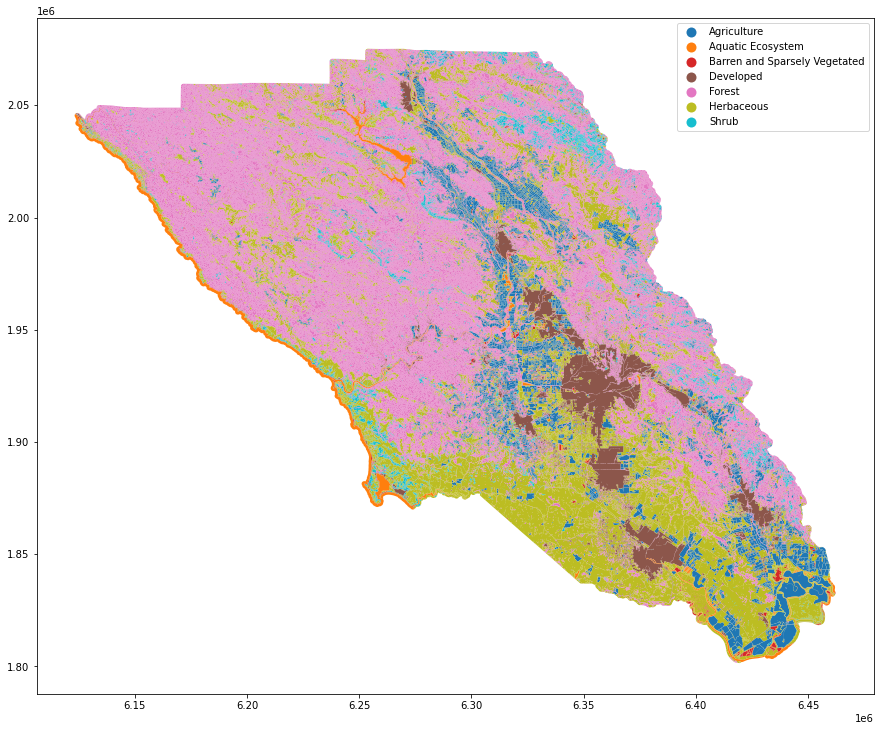

In [33]:
# plot simple agricultural sonoma veg
fig, ax = plt.subplots(figsize=(15,15))
sonoma_veg.plot(ax=ax, column="ag_simple", figsize = (12,10), legend=True)

In [16]:
# set the colors
from matplotlib.colors import ListedColormap
colors = ["peru", "blue", "red", "grey", "green", "bisque", "yellow"]
cmap=ListedColormap(colors)
#cmap=plt.cm.get_cmap('Dark2', 7)

<AxesSubplot:>

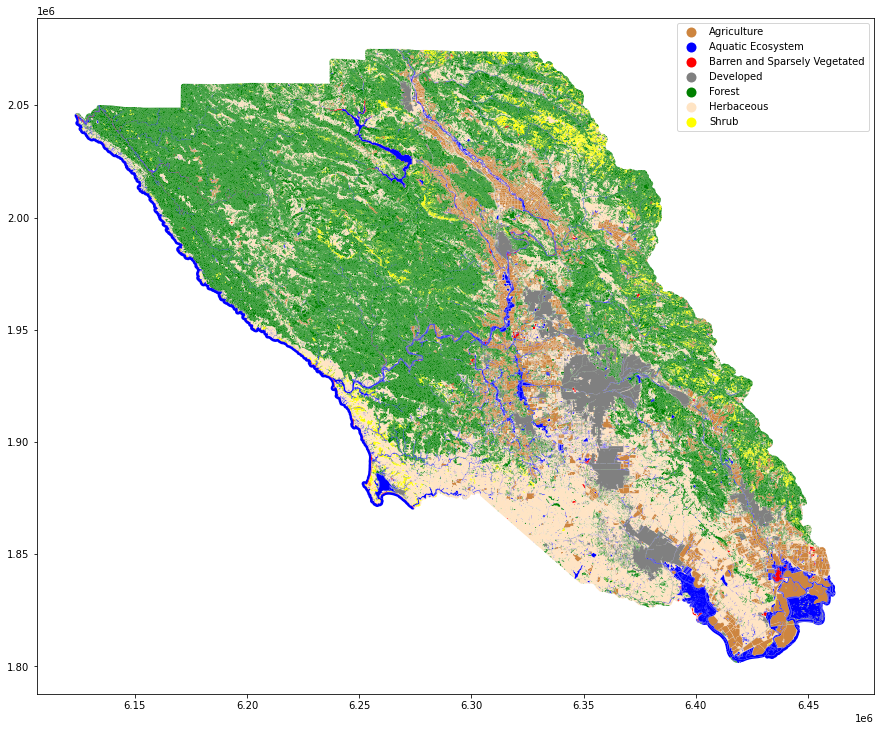

In [17]:
# plot simple natural lands sonoma veg
fig, ax = plt.subplots(figsize=(15,15))
sonoma_veg.plot(ax=ax, column="natural_simple", cmap=cmap, figsize = (12,10), legend=True)

In [37]:
sonoma_veg.columns

Index(['OBJECTID', 'MAP_CLASS', 'SOURCE', 'REL_COV', 'ALLIANCE', 'OID_COPY',
       'Abbrv', 'LIFEFORM', 'LF_FOREST', 'SERP_FLAG', 'TREE_HT_MN',
       'TREE_HT_MX', 'TREE_HT_SD', 'ABS_COVER', 'HDW_COV_LO', 'HDW_COV_HI',
       'CON_COV_LO', 'CON_COV_HI', 'PPT_IMPERV', 'PPT_PERV', 'PPT_PVD_RD',
       'PPT_DRT_RD', 'PPT_OT_IMP', 'PPT_BUILDG', 'BM_MG_HA', 'BM_MG_AC',
       'BM_MG', 'CB_MG_HA', 'CB_MG_AC', 'CB_MG', 'CB_EQVT_HA', 'CB_EQVT_AC',
       'CB_EQVTS', 'MN_P05', 'SD_P05', 'MN_P10', 'SD_P10', 'MN_P25', 'SD_P25',
       'MN_P50', 'SD_P50', 'MN_P75', 'SD_P75', 'MN_P90', 'SD_P90', 'MN_QAV',
       'SD_QAV', 'MN_SKE', 'SD_SKE', 'MN_AVG', 'MN_KUR', 'SD_KUR', 'MN_STD',
       'Shape_Leng', 'Shape_Area', 'geometry', 'ag_simple', 'natural_simple'],
      dtype='object')

In [40]:
# simplify sonoma veg for export
sonoma_veg_simple = sonoma_veg[["MAP_CLASS", 'LIFEFORM', 'ag_simple', 'natural_simple', 'LF_FOREST', 'Shape_Leng', 'Shape_Area', 'geometry']]

In [42]:
sonoma_veg_simple.to_file("../data/clean/sonoma_veg/sonoma_veg.shp")

C:\Users\AMarley\AppData\Local\Temp\ipykernel_13804\3508838259.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sonoma_veg_simple.to_file("../data/clean/sonoma_veg/sonoma_veg.shp")


In [12]:
# Get just ecoregions of Sonoma county
soco_ecoregion_l3 = gpd.overlay(ca_ecoregion_l3, soco_bound, how='intersection')
soco_ecoregion_l4 = gpd.overlay(ca_ecoregion_l4, soco_bound, how='intersection')

<AxesSubplot:>

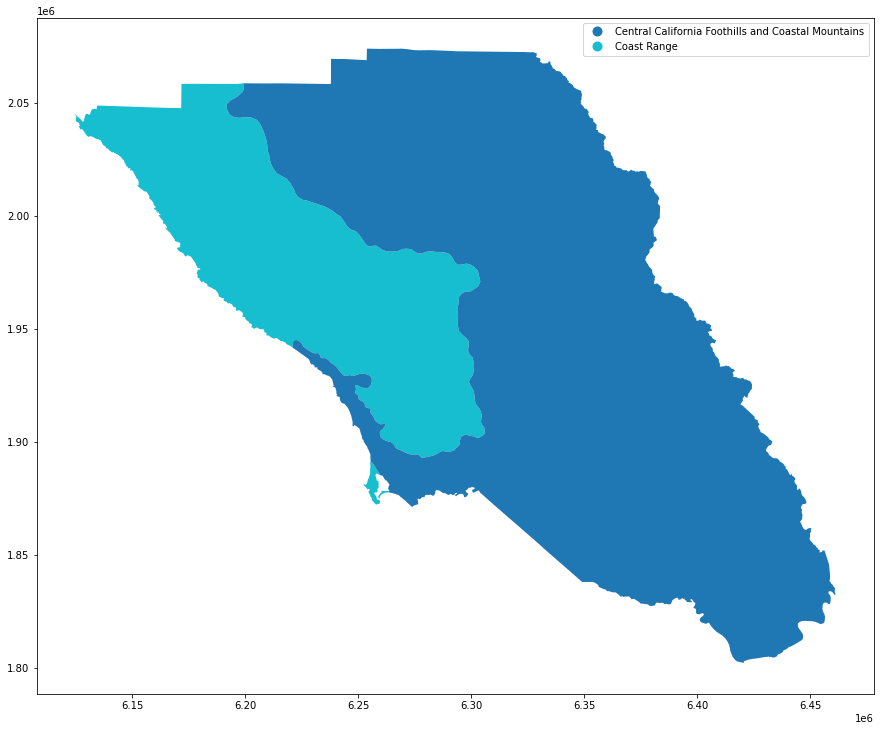

In [9]:
# CA Level 3 Ecoregion
fig, ax = plt.subplots(figsize=(15,15))
soco_ecoregion_l3.plot(ax=ax, column="US_L3NAME", figsize = (12,10), legend=True)

<AxesSubplot:>

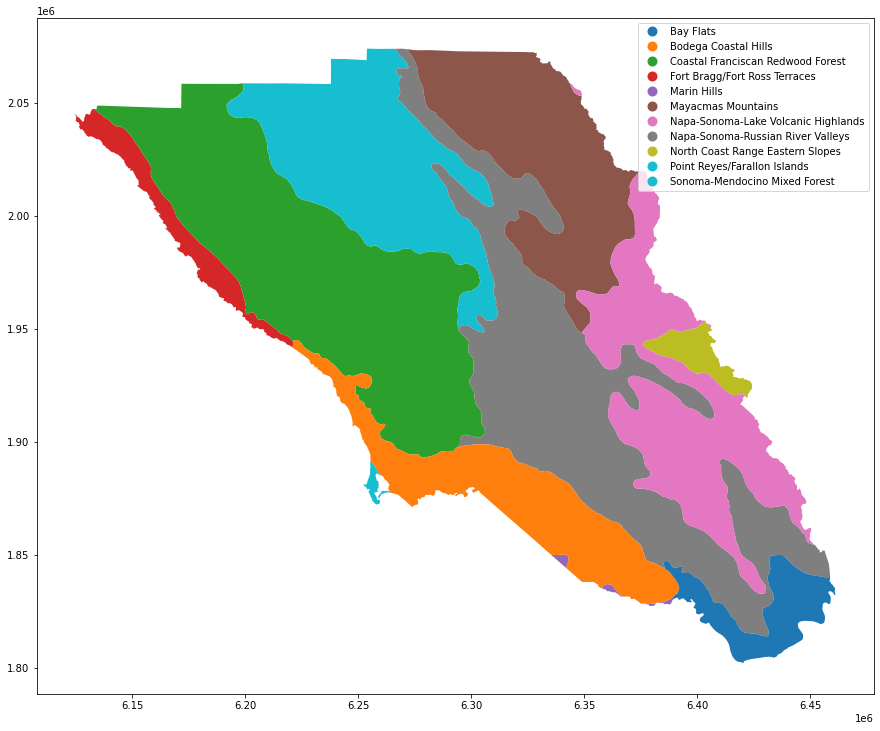

In [14]:
# CA Level 4 Ecoregion
fig, ax = plt.subplots(figsize=(15,15))
soco_ecoregion_l4.plot(ax=ax, column="US_L4NAME", figsize = (12,10), legend=True)